# **連接Google Drive**


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


# **讀入檔案**

In [ ]:
import json
import os
import re
import pandas as pd
import numpy as np
input_path = "/content/gdrive/MyDrive/dl_proj/HM-300.json"
input_path1 = "/content/gdrive/MyDrive/dl_proj/HM-300-1.json"
input_path2 = "/content/gdrive/MyDrive/dl_proj/HM-300-2.json"
with open(input_path,'r') as f:
  data = json.load(f)
with open(input_path1,'r') as f1:
  data1 = json.load(f1)
with open(input_path2,'r') as f2:
  data2 = json.load(f2)
print(len(data))
print(type(data))
print(len(data1))
print(type(data1))
print(len(data2))
print(type(data2))

112
<class 'dict'>
37
<class 'dict'>
39
<class 'dict'>


**確認檔案SHAPE**

In [ ]:
idx = 0
print(len(data))
print(type(data))
print(np.array(data[str(idx)]['r_hand']).shape)

112
<class 'dict'>
(300, 63)


# **train dataset**

In [ ]:
from keras.utils import np_utils
i = 0
trainx = []
trainy = []
for i  in range(0,112):
 trainx.append(np.array(data[str(i)]['r_hand']))
 trainy.append(int(data[str(i)]['r_ground_truth']))
 trainx.append(np.array(data[str(i)]['l_hand']))
 trainy.append(int(data[str(i)]['l_ground_truth']))
#print(np.array(trainx).shape)

for i  in range(0,37):
 trainx.append(np.array(data1[str(i)]['r_hand']))
 trainy.append(int(data1[str(i)]['r_ground_truth']))
 trainx.append(np.array(data1[str(i)]['l_hand']))
 trainy.append(int(data1[str(i)]['l_ground_truth']))
#print(np.array(trainx).shape)

for i  in range(0,29):
 trainx.append(np.array(data2[str(i)]['r_hand']))
 trainy.append(int(data2[str(i)]['r_ground_truth']))
 trainx.append(np.array(data2[str(i)]['l_hand']))
 trainy.append(int(data2[str(i)]['l_ground_truth']))
#print(np.array(trainx).shape)

trainy_onehot = np_utils.to_categorical(trainy)
print(np.array(trainx).shape)
trainy_onehot = np_utils.to_categorical(trainy) 
print(trainy_onehot.shape)

(356, 300, 63)
(356, 28)


去除機率

In [ ]:
trainxn = np.empty(shape = (356,300,42))
for i in range(0,356):
  for j in range(0,300):
    temp = 0
    for k in range(0,63):
      if((k+1)%3 != 0):
        #print(temp)
        trainxn[i][j][temp] = trainx[i][j][k]
        temp = temp + 1

print(np.array(trainxn).shape)
print(trainxn[1][1])

(356, 300, 42)
[398.282 395.801 373.069 386.144 347.318 373.806 328.542 359.858 309.766
 355.566 367.704 339.472 363.412 313.722 360.193 293.872 359.657 278.315
 384.871 339.472 385.407 307.284 384.334 283.68  385.407 274.023 398.282
 342.691 403.111 309.966 405.793 290.654 405.793 272.95  413.303 346.446
 423.496 325.524 428.861 313.185 436.371 300.846]


# **Model**

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, GRU, SimpleRNN, LSTM, Flatten
import keras
model= Sequential()
model.add(SimpleRNN(256, return_sequences=True))
model.add(SimpleRNN(128))
model.add(Dense(units=256, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(units=128, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=28,activation='relu'))

model.compile(loss='mse', optimizer='adagrad', metrics=['accuracy'])
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)
model.compile(loss='mse', optimizer = optimizer, metrics=['accuracy'])
model.build((356,300,42))
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (356, 300, 256)           76544     
                                                                 
 simple_rnn_1 (SimpleRNN)    (356, 128)                49280     
                                                                 
 dense (Dense)               (356, 256)                33024     
                                                                 
 dropout (Dropout)           (356, 256)                0         
                                                                 
 dense_1 (Dense)             (356, 128)                32896     
                                                                 
 dropout_1 (Dropout)         (356, 128)                0         
                                                                 
 dense_2 (Dense)             (356, 64)                 8

In [ ]:
trainy = np.array(trainy)
history = model.fit(trainxn, trainy_onehot, epochs = 50 , batch_size = 300, validation_split = 0.2)

Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 0.1233 - accuracy: 0.0423 - val_loss: 0.0736 - val_accuracy: 0.0833
Epoch 2/50
1/1 [==============================] - 2s 2s/step - loss: 0.1239 - accuracy: 0.0423 - val_loss: 0.0731 - val_accuracy: 0.0833
Epoch 3/50
1/1 [==============================] - 2s 2s/step - loss: 0.1243 - accuracy: 0.0352 - val_loss: 0.0725 - val_accuracy: 0.0833
Epoch 4/50
1/1 [==============================] - 2s 2s/step - loss: 0.1218 - accuracy: 0.0458 - val_loss: 0.0720 - val_accuracy: 0.0833
Epoch 5/50
1/1 [==============================] - 3s 3s/step - loss: 0.1202 - accuracy: 0.0352 - val_loss: 0.0714 - val_accuracy: 0.0833
Epoch 6/50
1/1 [==============================] - 3s 3s/step - loss: 0.1223 - accuracy: 0.0458 - val_loss: 0.0709 - val_accuracy: 0.0833
Epoch 7/50
1/1 [==============================] - 2s 2s/step - loss: 0.1206 - accuracy: 0.0282 - val_loss: 0.0704 - val_accuracy: 0.0833
Epoch 8/50
1/1 [=========================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


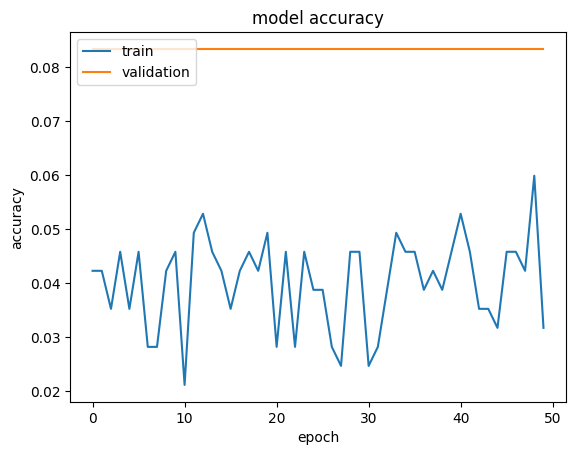

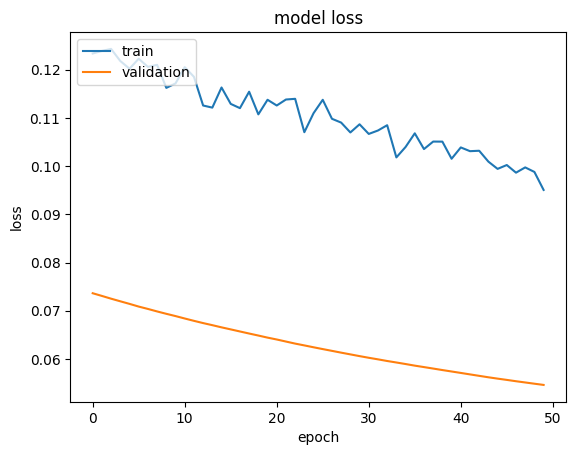

In [ ]:
import matplotlib.pyplot as plt
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# **test dataset**

In [ ]:
i = 100
testx = []
testy = []
for i  in range(29,38):
 testx.append(np.array(data2[str(i)]['r_hand']))
 testy.append(np.array(data2[str(i)]['r_ground_truth']))
 testx.append(np.array(data2[str(i)]['l_hand']))
 testy.append(np.array(data2[str(i)]['l_ground_truth']))

print(np.array(testx).shape)

去除機率

In [ ]:
testxn = np.empty(shape = (18,300,42))
for i in range(0,18):
  for j in range(0,300):
    temp = 0
    for k in range(0,63):
      if((k+1)%3 != 0):
        #print(temp)
        testxn[i][j][temp] = testx[i][j][k]
        temp = temp + 1
print(np.array(testxn).shape)
print(testxn[1][1])

In [ ]:
import math
testxn = np.array(testxn)
predict = model.predict(testxn)
print(np.argmax(predict,axis=1))

print(testy)